<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/71_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 71: Car Price Prediction - Model Evaluation

### Teacher-Student Activities

After rebuilding the linear regression model, in this class, we will find out the final features affecting the prices of cars and evaluate the model on all the important metrics such as coefficient of determination, MAE, MSE, RMSE and homoscedasticity. You will also get to learn basics of logarithm and another evaluation metric called MSLE.

Let's go through the activities covered in the previous class and begin this class from **Activity 1: Final Features** section.

---

### Problem Statement

Build a linear regression model to predict prices of cars based on its technical specifications such as car manufacturer, its engine capacity, fuel efficiency, body-type etc.

**Dataset Description:**

The dataset contains 205 rows and 26 columns. Each column represents an attribute of a car as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|Car_ID|Unique id of each car (Integer)|
|2|Symboling|Assigned insurance risk rating; a value of +3 indicates that the car is risky; -3 suggests that it is probably a safe car (Categorical)|
|3|carCompany|Name of car company (Categorical)|
|4|fueltype| fuel-type i.e. petrol or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|Body-type of a car (Categorical)|
|8|drivewheel|Type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Wheelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|Height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage (Numeric)|
|15|enginetype|Type of engine (Categorical)|
|16|cylindernumber|Number of cylinders placed in the car engine (Categorical)||17|enginesize|Capacity of an engine (Numeric)|
|18|fuelsystem|Fuel system of a car (Categorical)|
|19|boreratio|Bore ratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|Compression ratio of an engine (Numeric)|
|22|horsepower|Power output of an engine (Numeric)|
|23|peakrpm|Peak revolutions per minute (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of a car (Numeric)|

This data set consists of three types of entities:

- the specification of an auto in terms of various characteristics,

- its assigned insurance risk rating,

- its normalised losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling**. A value of $+3$ indicates that the auto is risky, $-3$ that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality etc.), and represents the average loss per car per year.

**Note:** Several of the attributes in the database could be used as a "class" attribute.

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Automobile


The above dataset consists of data taken from 1985 Ward's Automotive Yearbook. Here's the list of original sources of the data:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037






---

#### Importing Modules & Reading Data

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv

In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
cars_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/car-prices.csv")


# Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)

# Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company'] = car_companies

# Replace the misspelled 'car_company' names with their correct names.
# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

# Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

# Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])

# Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame.
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)

# Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
def num_map(series):
    return series.map(words_dict)

# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

# Create dummy variables for the 'carbody' columns.
car_body_dummies = pd.get_dummies(cars_df['carbody'], dtype = int)

# Create dummy variables for the 'carbody' columns with 1 column less.
car_body_new_dummies = pd.get_dummies(cars_df['carbody'], drop_first = True, dtype = int)

# Create a DataFrame containing all the non-numeric type features.
cars_categorical_df = cars_df.select_dtypes(include = ['object'])

#Get dummy variables for all the categorical type columns using the dummy coding process.
cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype = int)

#  Drop the categorical type columns from the 'cars_df' DataFrame.
cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)

# Concatenate the 'cars_df' and 'cars_dummies_df' DataFrames.
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)

#  Drop the 'car_ID' column
cars_df.drop('car_ID', axis = 1, inplace = True)

# Split the 'cars_df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size = 0.3, random_state = 42)

# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(cars_df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

# Normalise only the numeric columns.
def standard_norm(series):
  series_mean = series.mean()
  series_std = series.std()
  new_series = (series - series_mean) / series_std
  return new_series

X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)

# Highly correlated features
major_features = {}
for f in features:
  corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 15 



<ipython-input-1-780815a8c612>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
<ipython-input-1-780815a8c612>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)


{'wheelbase': 0.5778155982921496,
 'carlength': 0.6829200156779628,
 'carwidth': 0.7593252997415119,
 'curbweight': 0.8353048793372965,
 'cylindernumber': 0.7183049020002816,
 'enginesize': 0.8741448025245112,
 'boreratio': 0.5531732367984434,
 'horsepower': 0.8081388225362212,
 'citympg': -0.68575133602704,
 'highwaympg': -0.6975990916465566,
 'drivewheel_fwd': -0.6019502965330914,
 'drivewheel_rwd': 0.6389565386618764,
 'fuelsystem_2bbl': -0.5013743424965753,
 'fuelsystem_mpfi': 0.5170749892680737,
 'car_company_buick': 0.515094050057132}

---

#### Recursive Feature Elimination (RFE)

Select the best 10 features out of the highly correlated features that you just stored in the dictionary above.

To use RFE, you need to

1. Import the `RFE` class from the `sklearn.feature_selection` module.

2. Create an object of a `LinearRegression` class. Let's name it `skl_lin_reg`.

3. Create an object of the `RFE` class. Let's name it `rfe1`. The constructor of the `RFE` object takes the object of `LinearRegression` class (i.e. `skl_lin_reg`) and the number of features to be selected using RFE as inputs.

4. Call the `fit()` function on the `RFE` object with the train set (separate sets for independent variables and dependent variable) as input to the function.

Use the `support_` attribute of the `RFE` class to get an array containing boolean values wherein `True` denotes the feature selected by RFE. You can also use the `ranking_` attribute of the `RFE` class to to get the rankings of the features. The features selected by `RFE` are ranked $1$.

In [ ]:
# Use RFE to eliminate few features from the dataset.
# Import RFE.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 10 features.
skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg, n_features_to_select = 10)

# Fit with 10 features.
rfe1.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n") # List of features out of which 10 best featuers are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values
print(rfe1.ranking_, "\n") # Ranking of the features selected by RFE

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False  True  True  True  True  True  True  True False
 False  True  True] 

[5 3 1 4 1 1 1 1 1 1 1 6 2 1 1] 



In [ ]:
# Build a linear regression model using the 'statsmodels.api' module having the above 10 features selected using RFE.
# Import the 'statsmodels.api' module.
import statsmodels.api as sm

# Subset the train set such that it contains only the above 10 selected features.
rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
X_train_rfe1 = X_train[rfe_features]

# Add the 'const' column to the features set.
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fit the model with 10 features selected by RFE.
sm_lin_reg1 = sm.OLS(y_train, X_train_rfe1).fit()
print(sm_lin_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.03
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           3.16e-54
Time:                        07:38:40   Log-Likelihood:                -1336.8
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     132   BIC:                             2728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.412e+04    618.02

The $R^2$ and adjusted $R^2$ values are close to $1$ which is a good sign. However, the p-values for a few features are greater than 0.05 which is not a good sign. So let's also calculate the VIF values before you further eliminate more features.

In [ ]:
# Check for the VIF values of the 10 features selected by RFE above.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,citympg,19.90
7,highwaympg,17.69
3,enginesize,10.13
2,cylindernumber,6.79
0,const,6.53
5,horsepower,6.06
4,boreratio,2.89
1,carwidth,2.50
8,drivewheel_fwd,2.14
9,fuelsystem_mpfi,2.07


Here, you can see that a couple features have high VIF values which means there's a high probability of multicollinearity even though the `statsmodels.api` didn't throw a multicollinearity warning message. You need to remove this multicollinearity either by one-by-one eliminating features or by selecting the fewer features. Let's go with the latter approach.


**Note:** As a guideline, to further eliminate the features:

1. Calculate the number of features having high p-values. Let's say this is 5.

2. Calculate the number of features having high VIF values. Let's say this is 3.

3. The number of features to be further eliminated would be the maximum of the numbers obtained in steps 1 and 2. In this case, $\text{max}\{5, 3\} = 5$.

In [ ]:
# Use RFE to eliminate few features from the dataset.
# RFE with 5 features.
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2, n_features_to_select=5)

# Fit with 5 features.
rfe2.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n")
print(rfe2.support_, "\n")
print(rfe2.ranking_, "\n")

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False False  True False  True False False  True False
 False False  True] 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1] 



In [ ]:
# Build the linear regression model again using the most recently selected features by RFE
import statsmodels.api as sm

# Subset the train set such that it contains only the above 5 selected features.
rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
X_train_rfe2 = X_train[rfe_features]

# Add the 'const' column to the features set.
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fit the model with 5 features.
sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()
print(sm_lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           2.00e-58
Time:                        07:38:40   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.39

As you can see, the $R^2$ and adjusted $R^2$ values are pretty high. The p-values for all the 5 features selected are less than 0.05. These are great signs. Now let's calculate the VIF values for these 5 features to see if there is negligible multicollinearity.

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


As you can see, the VIF values for all the features is less than 10. Hence, we can safely assume that the multicollinearity between these features is negligible.

Let's stop here. In the next class, we will evaluate this linear regression model further using the MAE, MSE, RMSE parameters and also analyse the residuals.

In [ ]:
#significant values for:
#VIF---   <10
#p value---   <0.05
#RMSE,MSE,MAE,------ nearer to 0
#Accuract score-->R2 score and adjusted R2score--> nearer to 1

---

#### Activity 1: Final Features

Now that we have obtained the features that has satisfactory  VIF values and p-values, let's build linear regression model using the `sklearn` module to make predictions on the test set as well and evaluate the efficacy of the model using the MAE, MSE, RMSE parameters and also analyse the residuals.

In [ ]:
# S1.1: Create a list of final features and build a linear regression model using the 'sklearn' module.
X_train_rfe2.columns
X_train_final=X_train_rfe2.drop(columns='const')
X_train_final
sklearn_final=LinearRegression().fit(X_train_final,y_train)
y_train_pred=sklearn_final.predict(X_train_final)
y_train_pred[:10]

array([11614.67148027, 20805.93850454,  9737.85451687,  6747.05425956,
       16681.44092811,  6824.7936787 , 19864.14770684, 10931.14320868,
        7165.9828108 , 15535.30134   ])

Now let's evaluate the efficacy of the model using the $R^2$, adjusted-$R^2$ MAE, MSE and RMSE parameters.

In [ ]:
# S1.2: Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error,mean_absolute_error
r2_score_train=r2_score(y_train,y_train_pred)
adjusted_r2_score=1-(1-r2_score_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print('adjusted_r2_score=',adjusted_r2_score)
print('r2_score_train=',r2_score_train)
print('MSE=',mean_squared_error(y_train,y_train_pred))
print('MAE=',mean_absolute_error(y_train,y_train_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_train,y_train_pred)))

adjusted_r2_score= 0.7742359126119904
r2_score_train= 0.868039301033769
MSE= 8042954.08342041
MAE= 2080.493944076901
RMSE= 2836.010240358876


---

#### Activity 2: Mean-Squared Log Error (MSLE)

When you are predicting large numbers (such as prices, length in millimeter scale etc), often the errors (difference between the actual and the predicted values) are also quite large. In such cases, the MSE, MSE and RMSE values are also large that might give us a false sense that the prediction model is poor. Hence, in such cases, it is best to use another parameter to analyse the errors. This parameter is called **Mean-Squared Log Error (MSLE)**.

Mathematically, it is written as

$$\text{MSLE} = \frac{1}{n}\left( \log{(y_\text{actual} + 1)} - \log{(y_\text{predicted} + 1)} \right)^2$$

Before we further with MSLE, let's take quick at log or logarithm used in the formula.

**What is natural logarithm or log?**

Consider a number $32$. It can also be written as $2^5$ i.e.

$$2^{5} = 32$$

Here, the number $2$ is called **base**, the number $5$ is called **exponent (or index or power)**.

The above mathematical statement can be written as **When $2$ raised to the power $5$, the number obtained is 32.**

Now if you flip the above statement as **to what power the number 2 should be raised to so that the number obtained is 32**.

This is flipped statement (or rather a question) is roughly the definition of a logarithm.

Mathematically, it is written as

$$\log_2 32 = 5$$

The implication

$$2^{5} = 32 \Leftrightarrow \log_2 32 = 5$$

is also true.

In general, you can say **to what power a base (say $b$) should be raised to so that the number obtained is $c$.**

The diagramatic of explanation of the above general definition is shown below.

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/log_explanation.png' width = 500>

Let's look into the process stepwise:

**Step 1:** For exponentiation multiply $b$ with itself $n$ times to get the result $c$

$$b^n = b \times b \times b \times b \times \dots \times b \space{} (n \: \text{times})$$

For eg.,

$$2^5 =  2 \times 2 \times 2 \times 2 \times 2$$

**Step 2:** This can be written as when $b$ raise to the power of $n$ gives result $c$

$$b^n = c$$

For eg.,


$$2^5 = 32$$


**Note** Here $b$ and $n$ are known values and $c$ is unknown value. $b$ is the base value and $n$ is the exponent and $c$ is the product of exponentiation.

**Step 3:** Now lets reverse the formula a bit, a known $c$ can be achieved by multiplying a known $b$ by itself unknown number of times. That means exponent, i.e. $n$ is unknown It can be written as

$$\color{blue}b^\color{red}{n} = c$$

**Step 4:** By solving the above formula, we get

$$\color{red}{n} = {\log_\color{blue}b}(c)$$

For eg.,

$$5 = \log_2 32$$

The above can be written as logarithm of $c$ to the base $b$ will tell us value of the exponent $n$ means **how many times should $b$ be multiplied with $n$ to achieve $c$**.

In layman terms,

1. **Exponentiation** is starting with a base number and multiplying it with itself a certain exponent times which will give us some target.

  For example, if a task needs to be completed by putting in same amount of effort again and again, using exponentiation, we can find out if we apply the effort certain number of times what proportion of the task will be completed.

2. **Logarithm** is starting with the base and target value and find out how many times the base must be multiplied by itself i.e. find the exponent value.

Now you find out the value of $\log_5 625$

 Let's get a look about the mathematical functions for exponentiation and logarithm in python.

 In python, `math` module has functions `pow()` and `log()` functions for exponentiation and logarithm. The syntax is as followed:

 >**Syntax:** `math.pow(x, y)`: `pow()` returns `x**y` (x to the power of y).

 >**Syntax:** `math.log(x[, base])`

`log()` returns the natural logarithm to the base-e of the number x (if the base is not defined). If the base is defined, it returns the given base's logarithm of the number x.

You will get to learn about logarithms in more detail in the subsequent classes.


In [ ]:
# S2.1 Import math and use 'pow()' to calculate 32nd power of 2 and log of 4294967296 to the base 2
import math
print(math.pow(2,5))
print(math.log(32,2))

32.0
5.0


As it can be observed log and exponentiation are inverse of each other.

Back to MSLE, it is the difference log of the  actual values and predictions.

**Note:** The `1` added to both actual values and predictions in the MSLE formula is to avoid the taking the logarithm of `0` because **log of zero is not defined.**

Let's calculate the MSLE of the regression model created above using the `mean_squared_log_errror()` from the `sklearn.metrics` module using the syntax below:

> **Syntax:** `mean_squared_log_error(y_true, y_pred)`

In [ ]:
# S2.2: Evaluate the linear regression model based on MSLE.
print(mean_squared_log_error(y_train,y_train_pred))

0.03430939459516446


MSLE returns the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

It means that MSLE will treat small true and predicted values difference which will also be small approximately the same as big differences between large true and predicted values.

The MSLE is low which is good for our model.

---

#### Activity 3: Residual Analysis

Let's now analyse the residuals (or errors) to further evaluate the efficay of the model.

**Homoscedasticity**

Let's check if the error terms are normally distributed. **For a line to be the best fit line, the mean of random errors (differene between the actual and predicted values) or mean of errors (or $\epsilon$) should be 0.**

Let us plot the histogram of the error terms and see what it looks like.

<ipython-input-13-b1dfe3dd981f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error_train,bins='sturges')


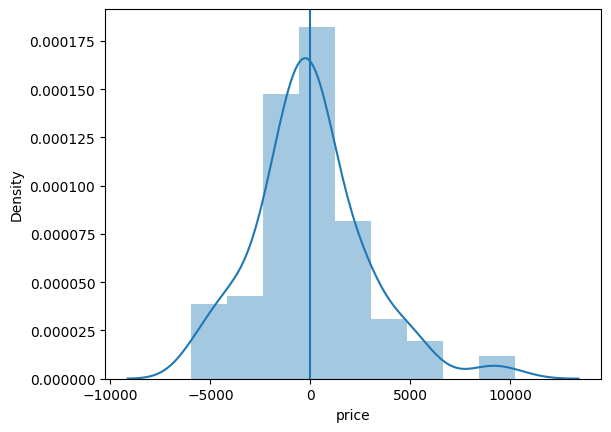

In [ ]:
# S3.1: Create a histogram for the errors obtained in the predicted values for the train set.
error_train=y_train-y_train_pred
sns.distplot(error_train,bins='sturges')
plt.axvline(error_train.mean())


The mean of residuals is zero for the train set which is exactly what we want for a reliable linear regression model.

**Homoscedasticity**

In addition to checking for the mean of errors, you also need to check for the Homoscedasticity.

Again as you know for homoscedasticity, we need to check the trend in the scatter plot between the errors and predictions. **There should not be a trend** because if there is a trend then it means the variance changes or varies as increase or decrease the actual values.

Let's create a scatter plot between the errors and predictions for the train set to see whether there is some kind of relationship between the two.

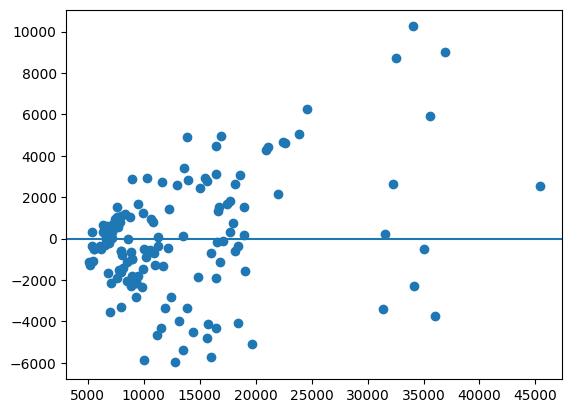

In [ ]:
# S3.2: Create a scatter plot between 'train_residuals' and 'y_train'.
plt.scatter(y_train,error_train)
plt.axhline(error_train.mean())

The scatter plot between the residuals and the actual prices for the train set doesn't follow any kind of pattern. The dots are randomly scattered which is again exactly what we want.

**Scatter Plot Between Actual & Predicted Values**

Let's create a scatter plot between the actual values and predictions for the train set to see whether there is some kind of relationship between the two.

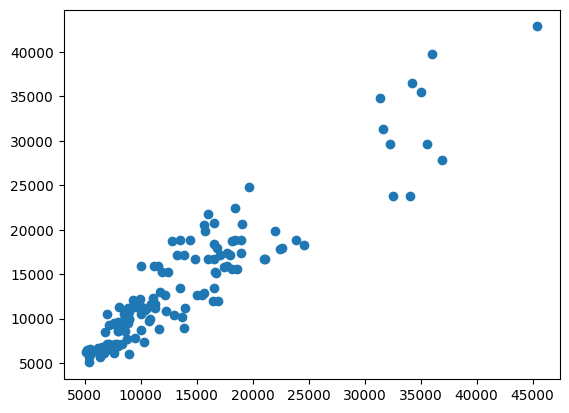

In [ ]:
# S3.3: Create a scatter plot for actual values and predictions of the training data set
plt.scatter(y_train,y_train_pred)


This scatter plot between the actual and predicted prices follow almost a straight line which suggests the predicted prices are close to the actual prices of a car.  

---

#### Activity 4: Prediction on Test Set

Let's repeat the model evaluation using the test set.

Let's first create the `X_test` dataset using the same features finalized for the training data `X_train_final` using RFE.

In [ ]:
# S4.1: Predict the car prices on the test set.

X_test_final = X_test[X_train_final.columns]
X_test_final


,carwidth,enginesize,horsepower,drivewheel_fwd,car_company_buick
15,0.571482,1.939489,2.162700,0,0
9,1.056186,0.102198,1.579135,0,0
100,-0.252515,-0.156907,-0.091984,1,0
132,0.377600,-0.133352,0.252850,1,0
68,2.219476,1.327059,0.597684,0,1
...,...,...,...,...,...
56,-0.010163,-1.334657,0.014119,0,0
128,-0.349456,1.586164,2.825842,0,0
76,-0.640279,-0.816447,-0.861229,1,0
144,-0.155574,-0.439567,-0.489870,0,0


Let us get the predictions for the testing data using the recent model and `predict()` function

In [ ]:
# S4.2: Create a variable and store the predictions of the testing dataset returned by `predict()` in it.
y_test_pred=sklearn_final.predict(X_test_final)
y_test_pred[:10]

array([25551.02324283, 20149.47788471, 11279.52529162, 13225.58115796,
       31017.07788154,  6944.38671721,  7429.93375271,  7562.49609129,
       10510.58085045,  7276.13263097])

Now let's evaluate the efficacy of the model using the $R^2$, adjusted-$R^2$ MAE, MSE, RMSE and MSLE parameters.

In [ ]:
# S4.3: Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error', 'mean_squared_log_error' functions of the 'sklearn' module.
r2_score_test=r2_score(y_test,y_test_pred)
adjusted_r2_score=1-(1-r2_score_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print('adjusted_r2_score=',adjusted_r2_score)
print('r2_score_train=',r2_score_test)
print('MSE=',mean_squared_error(y_train,y_train_pred))
print('MAE=',mean_absolute_error(y_train,y_train_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_train,y_train_pred)))

adjusted_r2_score= -5.389215403476037
r2_score_train= 0.790517527754884
MSE= 8042954.08342041
MAE= 2080.493944076901
RMSE= 2836.010240358876


Let us plot the histogram of the error terms and predictions of the testing data and see what it looks like to evaluate the model on the residual analysis.

<ipython-input-19-ba61fb85e472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error_test,bins='sturges')


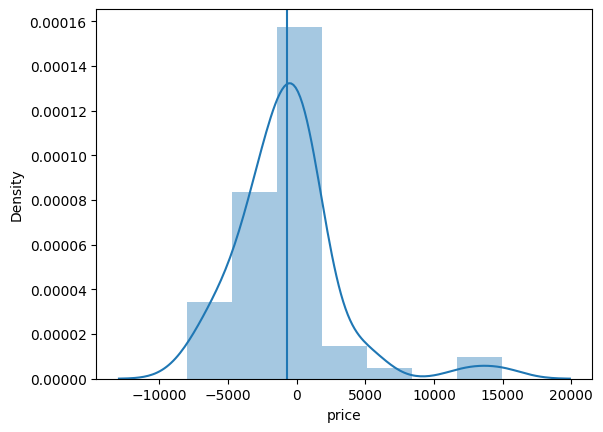

In [ ]:
# S4.3: Create a histogram for the errors obtained in the predicted values for the testing set.
error_test=y_test-y_test_pred
sns.distplot(error_test,bins='sturges')
plt.axvline(error_test.mean())

The mean of residuals should have been zero. But the MSLE is low. So, we can still trust the reliability of the linear regression model that we built.


Let us observe the trend between the actual prices and the residuals for the test set using the scatter plot.

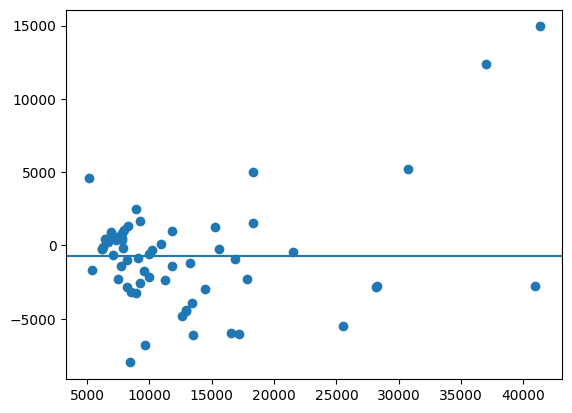

In [ ]:
# S4.4: Create a scatter plot for the errors obtained in the actual values for the test set for checking homoscedasticity .
plt.scatter(y_test,error_test)
plt.axhline(error_test.mean())

The scatter plot between the residuals and the actual prices for the test set as well doesn't follow any kind of pattern. The dots are randomly scattered which is again exactly what we want.


Let us observe the trend between the actual values and the predictions of the testing dataset.

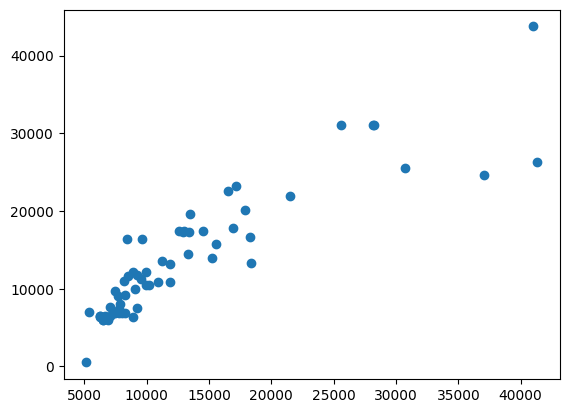

In [ ]:
# S4.5: Create a scatter plot for the actual values and the predictions of the testing dataset.
plt.scatter(y_test,y_test_pred)

This scatter plot between the actual and predicted prices follow somewhat straight line which suggests that most of the predicted prices are close to the actual prices of a car.  

So finally the most important features and their corresponding regression coeffients are

|Feature|Coefficient|
|-|-|
|`carwidth`|1696.2271|
|`enginesize`|2636.6328|
|`horsepower`|2363.8354|
|`drivewheel_fwd`|-2016.6827|
|`car_company_buick`|7984.8761|

Hence, the regression equation is

$$Y = 14360 + 1696.2271x_1 + 2636.6328x_2 + 2363.8354x_3 - 2016.6827x_4 + 7984.8761x_5$$

where

- $Y$ is the price of a car

- $x_1$ is `carwidth`

- $x_2$ is `enginesize`

- $x_3$ is `horsepower`

- $x_4$ is `drivewheel_fwd`

- $x_5$ is `car_company_buick`

This concludes linear regression. Let's stop here. from the next class onwards, you will learn another classification-based machine learning algorithm called logistic regression.

---